In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/dump_gw/report.tsv"

tool_pretty_names = {
    "cooler_cooler": "cooler",
    "hictk_cooler": "hictk (cooler)",
    "hictk_hic": "hictk (hic)",
}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "forestgreen", "orange"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "tool"])

In [4]:
df = import_data(bench_results)
df1 = df.groupby(["tool", "resolution"])["time"].median().reset_index()

cooler_runtime = df1.loc[df1["tool"] == "cooler", "time"].to_numpy()
straw_runtime = df1.loc[df1["tool"] == "straw", "time"].to_numpy()
straw_sorted_runtime = df1.loc[df1["tool"] == "straw (sorted)", "time"].to_numpy()
hictk_cooler_runtime = df1.loc[df1["tool"] == "hictk (cooler)", "time"].to_numpy()
hictk_hic_runtime = df1.loc[df1["tool"] == "hictk (hic)", "time"].to_numpy()

df1 = df.groupby(["tool", "resolution"])["memory"].median().reset_index()

cooler_memory = df1.loc[df1["tool"] == "cooler", "memory"].to_numpy()
straw_memory = df1.loc[df1["tool"] == "straw", "memory"].to_numpy()
straw_sorted_memory = df1.loc[df1["tool"] == "straw (sorted)", "memory"].to_numpy()
hictk_cooler_memory = df1.loc[df1["tool"] == "hictk (cooler)", "memory"].to_numpy()
hictk_hic_memory = df1.loc[df1["tool"] == "hictk (hic)", "memory"].to_numpy()

df

,tool,format,resolution,time,memory,time_min,memory_gb,resolution_pretty
0,cooler,cooler,10,8354.88,13165432,139.248000,13.165432,10
39,cooler,cooler,10,8206.55,13163796,136.775833,13.163796,10
78,cooler,cooler,10,8329.56,13166632,138.826000,13.166632,10
13,hictk (cooler),cooler,10,1362.10,111672,22.701667,0.111672,10
52,hictk (cooler),cooler,10,1343.64,111408,22.394000,0.111408,10
...,...,...,...,...,...,...,...,...
60,hictk (cooler),cooler,2500000,0.28,28140,0.004667,0.028140,2.5M
99,hictk (cooler),cooler,2500000,0.29,28156,0.004833,0.028156,2.5M
34,hictk (hic),hic,2500000,0.30,17092,0.005000,0.017092,2.5M
73,hictk (hic),hic,2500000,0.29,17176,0.004833,0.017176,2.5M


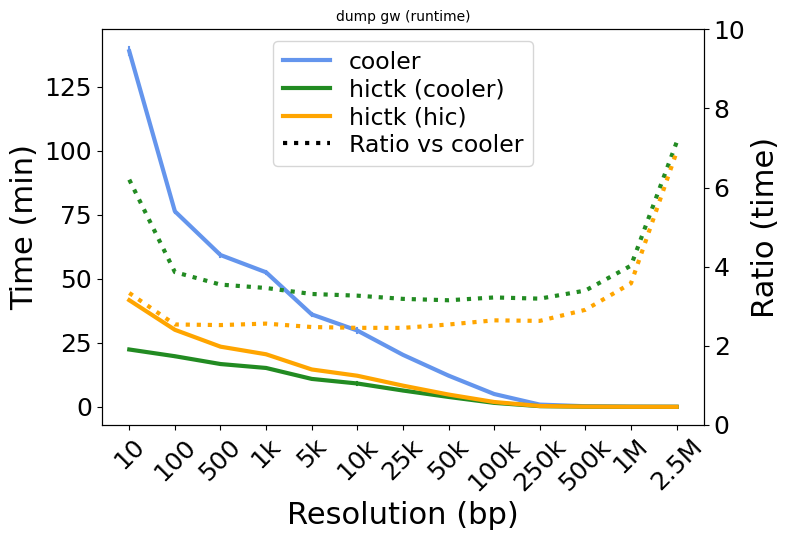

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))
ax2 = ax1.twinx()


sns.lineplot(
    df,
    x="resolution_pretty",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=True,
)

palette = sns.color_palette()
ax2.plot(
    list(range(df["resolution"].nunique())),
    cooler_runtime / hictk_cooler_runtime,
    linestyle="dotted",
    color=color_palette[1],
    linewidth=3,
)
ax2.plot(
    list(range(df["resolution"].nunique())),
    cooler_runtime / hictk_hic_runtime,
    linestyle="dotted",
    color=color_palette[2],
    linewidth=3,
)

ax1.set(title="dump gw (runtime)", ylabel="Time (min)", xlabel="Resolution (bp)")

ax1.tick_params(axis="x", rotation=45)
ax2.set(ylabel="Ratio (time)", ylim=(0, 10))

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color="black", linestyle="dotted", lw=3, label="Ratio vs cooler"),
    ],
    labelspacing=0.2,
    loc="upper center",
)

loc1 = plticker.MultipleLocator(base=25)
loc2 = plticker.MultipleLocator(base=2)
ax1.yaxis.set_major_locator(loc1)
ax2.yaxis.set_major_locator(loc2)

fig.tight_layout()
fig.savefig("/tmp/dump_gw_runtime.png", dpi=600)
fig.savefig("/tmp/dump_gw_runtime.svg")

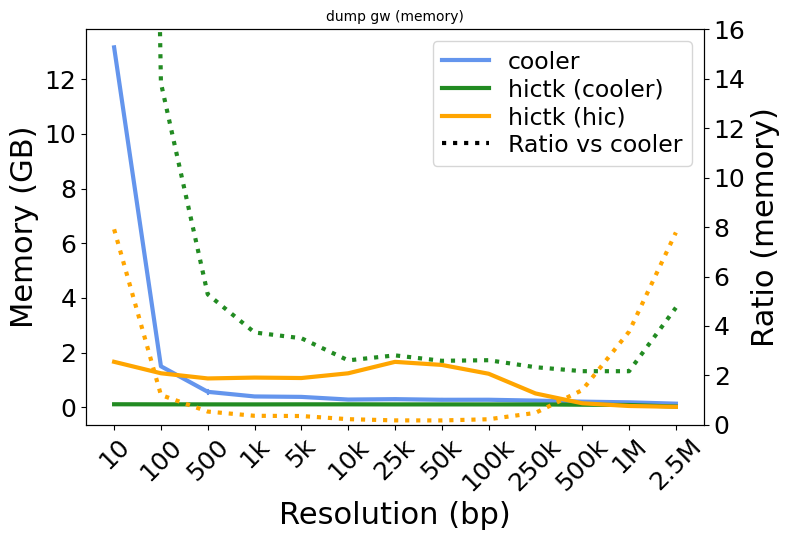

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))
ax2 = ax1.twinx()


sns.lineplot(
    df,
    x="resolution_pretty",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=False,
)

palette = sns.color_palette()
ax2.plot(
    list(range(df["resolution"].nunique())),
    cooler_memory / hictk_cooler_memory,
    linestyle="dotted",
    color=color_palette[1],
    linewidth=3,
)
ax2.plot(
    list(range(df["resolution"].nunique())),
    cooler_memory / hictk_hic_memory,
    linestyle="dotted",
    color=color_palette[2],
    linewidth=3,
)

ax1.set(title="dump gw (memory)", ylabel="Memory (GB)", xlabel="Resolution (bp)")

ax1.tick_params(axis="x", rotation=45)
ax2.set(ylabel="Ratio (memory)", ylim=(0, 16))

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color="black", linestyle="dotted", lw=3, label="Ratio vs cooler"),
    ],
    labelspacing=0.2,
)

loc1 = plticker.MultipleLocator(base=2)
loc2 = plticker.MultipleLocator(base=2)
ax1.yaxis.set_major_locator(loc1)
ax2.yaxis.set_major_locator(loc2)

fig.tight_layout()
fig.savefig("/tmp/dump_gw_memory.png", dpi=600)
fig.savefig("/tmp/dump_gw_memory.svg")

In [12]:
df[df["tool"] == "hictk (cooler)"]

,tool,format,resolution,time,memory,time_min,memory_gb,resolution_pretty
13,hictk (cooler),cooler,10,1362.10,111672,22.701667,0.111672,10
52,hictk (cooler),cooler,10,1343.64,111408,22.394000,0.111408,10
91,hictk (cooler),cooler,10,1341.93,111736,22.365500,0.111736,10
14,hictk (cooler),cooler,100,1179.94,108412,19.665667,0.108412,100
53,hictk (cooler),cooler,100,1202.34,108568,20.039000,0.108568,100
92,hictk (cooler),cooler,100,1185.99,108560,19.766500,0.108560,100
22,hictk (cooler),cooler,500,1002.99,107300,16.716500,0.107300,500
61,hictk (cooler),cooler,500,1010.64,107052,16.844000,0.107052,500
100,hictk (cooler),cooler,500,1000.97,107300,16.682833,0.107300,500
15,hictk (cooler),cooler,1000,920.42,106512,15.340333,0.106512,1k


In [13]:
df[df["tool"] == "hictk (hic)"]

,tool,format,resolution,time,memory,time_min,memory_gb,resolution_pretty
26,hictk (hic),hic,10,2507.99,1664344,41.799833,1.664344,10
65,hictk (hic),hic,10,2493.03,1664184,41.550500,1.664184,10
104,hictk (hic),hic,10,2498.65,1662812,41.644167,1.662812,10
27,hictk (hic),hic,100,1806.42,1244488,30.107000,1.244488,100
66,hictk (hic),hic,100,1804.92,1245284,30.082000,1.245284,100
105,hictk (hic),hic,100,1798.17,1245240,29.969500,1.245240,100
35,hictk (hic),hic,500,1412.75,1056360,23.545833,1.056360,500
74,hictk (hic),hic,500,1402.50,1055724,23.375000,1.055724,500
113,hictk (hic),hic,500,1409.87,1055900,23.497833,1.055900,500
28,hictk (hic),hic,1000,1233.28,1087468,20.554667,1.087468,1k
